In [82]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [84]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df.info()#info of dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [86]:
df.describe()#stats

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


price            1.000000
sqft_living      0.700905
grade            0.662290
sqft_above       0.603312
sqft_living15    0.598540
bathrooms        0.520171
view             0.404975
sqft_basement    0.329258
lat              0.306885
bedrooms         0.297623
waterfront       0.279745
floors           0.278254
yr_renovated     0.134056
sqft_lot         0.092417
sqft_lot15       0.080679
condition        0.046763
yr_built         0.036825
long             0.015396
zipcode         -0.046708
Name: price, dtype: float64


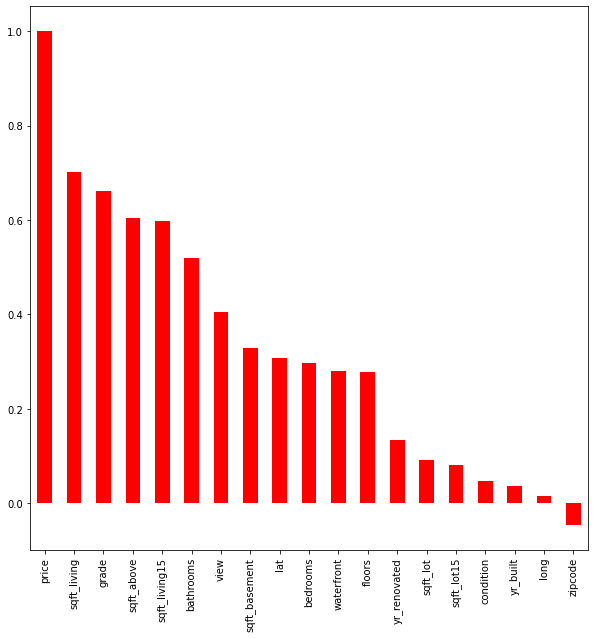

In [87]:
#correlation bar graph
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
s = corr_matrix['price'].sort_values(ascending = False)
print(s)
s.plot.bar(color='red')


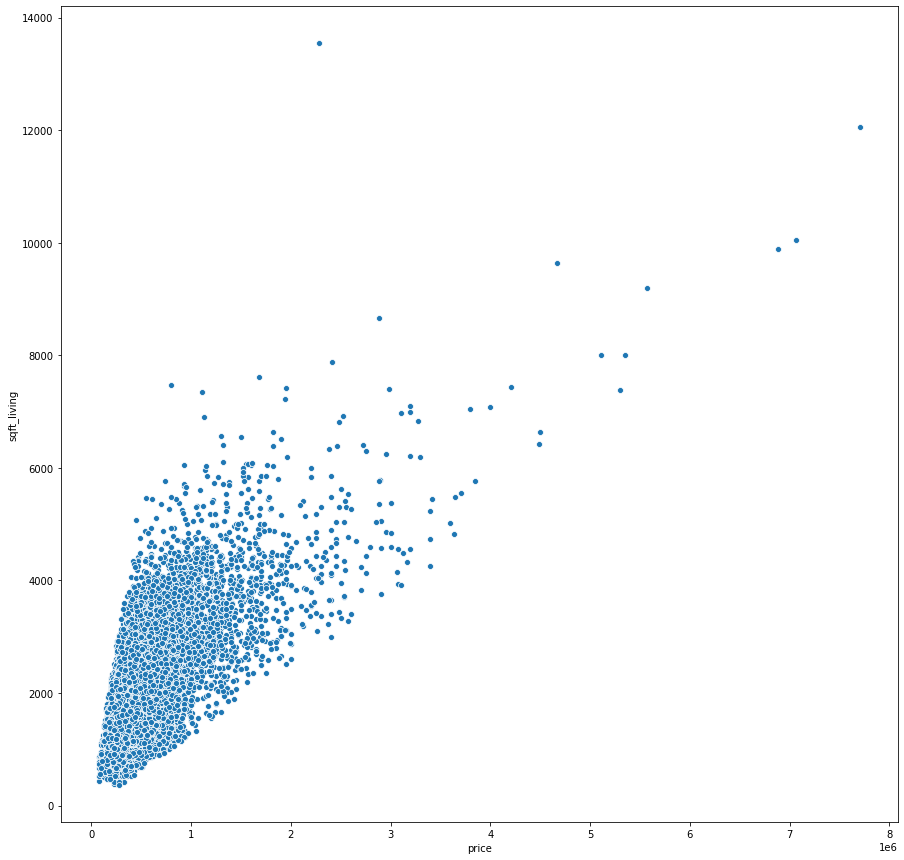

In [88]:
#since price is higly correlated to sqft
plt.figure(figsize = (15,15))
sns.scatterplot(x = df['price'], y = df['sqft_living'])

In [89]:
#normalizing data
from sklearn import preprocessing
columns=df.columns
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=columns


In [90]:
#model training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X=df.drop(columns=['price'], axis=1)
Y=df['price']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
model=DecisionTreeRegressor(max_depth = 5,random_state = 42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [91]:
#model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(y_test,y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.6946269657860427
0.02830727997161792
